In [1]:
# Suppressing Warnings

import warnings
warnings.filterwarnings('ignore')


# Importing libraries

import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
import plotly.express as px
from datetime import datetime, timedelta





In [2]:
df = pd.read_csv('/Users/benadams/Downloads/elontweets.csv')
df.head()


,Tweets,Retweets,Likes,Date,Cleaned_Tweets
0,@PeterSchiff 🤣 thanks,209,7021,2022-10-27 16:17:39,thanks
1,@ZubyMusic Absolutely,755,26737,2022-10-27 13:19:25,Absolutely
2,Dear Twitter Advertisers https://t.co/GMwHmInPAS,55927,356623,2022-10-27 13:08:00,Dear Twitter Advertisers
3,Meeting a lot of cool people at Twitter today!,9366,195546,2022-10-26 21:39:32,Meeting a lot of cool people at Twitter today!
4,Entering Twitter HQ – let that sink in! https:...,145520,1043592,2022-10-26 18:45:58,Entering Twitter HQ – let that sink in!


In [3]:
# remove tweets where the cleaned version is empty
df.drop(df[df['Cleaned_Tweets'] == ''].index, inplace = True)

In [4]:
#function to get the subjectivity of a tweet
def getSubjectivity(twt):
  return TextBlob(twt).sentiment.subjectivity

#function to get the polarity of a tweet
def getPolarity(twt):
  return TextBlob(twt).sentiment.polarity

In [5]:
#Create two new columns to save the results of the created functions 
df['Subjectivity'] = df['Cleaned_Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Cleaned_Tweets'].apply(getPolarity)

In [6]:
#Find all tweets containing the word twitter
twitter_df = df[df['Cleaned_Tweets'].str.contains(r'\bTwitter\b', case=False, na=False)]
twitter_df.shape
twitter_df.head(5)


,Tweets,Retweets,Likes,Date,Cleaned_Tweets,Subjectivity,Polarity
2,Dear Twitter Advertisers https://t.co/GMwHmInPAS,55927,356623,2022-10-27 13:08:00,Dear Twitter Advertisers,0.000000,0.000000
3,Meeting a lot of cool people at Twitter today!,9366,195546,2022-10-26 21:39:32,Meeting a lot of cool people at Twitter today!,0.650000,0.437500
4,Entering Twitter HQ – let that sink in! https:...,145520,1043592,2022-10-26 18:45:58,Entering Twitter HQ – let that sink in!,0.000000,0.000000
5,@ARodTV Definitely closer to citizen journalis...,699,10189,2022-10-26 17:05:16,Definitely closer to citizen journalism – loca...,0.333333,0.166667
7,A beautiful thing about Twitter is how it empo...,37951,294406,2022-10-26 15:27:40,A beautiful thing about Twitter is how it empo...,0.812500,0.675000


In [7]:
#Find all tweets containing the word spaceX
spaceX_df = df[df['Cleaned_Tweets'].str.contains(r'\SpaceX\b', case=False, na=False)]
spaceX_df.shape

(53, 7)

In [8]:
#Find all tweets containing the word tesla
tesla_df = df[df['Cleaned_Tweets'].str.contains(r'\bTesla\b', case=False, na=False)]
tesla_df.shape
tesla_df.head(5)

,Tweets,Retweets,Likes,Date,Cleaned_Tweets,Subjectivity,Polarity
68,@teslaownersSV @BillyM2k Varies a lot. Tesla &...,337,3623,2022-10-21 06:11:05,Varies a lot. Tesla &amp; SpaceX are in good p...,0.491667,0.358333
278,In case you missed Tesla AI Day 2022\nhttps://...,3087,42431,2022-10-07 14:11:05,In case you missed Tesla AI Day 2022,0.000000,0.000000
287,Excited to announce start of production of Tes...,31298,363590,2022-10-06 23:50:57,Excited to announce start of production of Tes...,0.750000,0.468750
308,"@LindseyGrahamSC First of all, Tesla hasn’t ha...",4545,41444,2022-10-06 01:27:54,"First of all, Tesla hasn’t had that consumer t...",0.333333,0.250000
341,@WholeMarsBlog Would be cool to make a game us...,381,6011,2022-10-03 07:58:13,Would be cool to make a game using Tesla Sim t...,0.446296,-0.068519


In [9]:
# Create an interactive scatterplot
fig = px.scatter(
    df,
    x='Polarity',
    y='Subjectivity',
    #Show cleaned tweets on hover
    hover_data={'Cleaned_Tweets': True},  
    title='Scatterplot of Subjectivity vs Polarity - all tweets',
    labels={'Polarity': 'Polarity', 'Subjectivity': 'Subjectivity'}
)

# Show the plot
fig.show()

In [10]:
# Create an interactive scatterplot
fig = px.scatter(
    twitter_df,
    x='Polarity',
    y='Subjectivity',
    hover_data={'Cleaned_Tweets': True},  # Show cleaned tweets on hover
    title='Scatterplot of Subjectivity vs Polarity - tweets discussing Twitter only',
    labels={'Polarity': 'Polarity', 'Subjectivity': 'Subjectivity'}
)

# Show the plot
fig.show()

In [11]:
# Create an interactive scatterplot
fig = px.scatter(
    spaceX_df,
    x='Polarity',
    y='Subjectivity',
    # Show cleaned tweets on hover
    hover_data={'Cleaned_Tweets': True},  
    title='Scatterplot of Subjectivity vs Polarity - tweets discussing spaceX only',
    labels={'Polarity': 'Polarity', 'Subjectivity': 'Subjectivity'}
)

# Show the plot
fig.show()

In [12]:
# Create an interactive scatterplot
fig = px.scatter(
    tesla_df,
    x='Polarity',
    y='Subjectivity',
    # Show cleaned tweets on hover
    hover_data={'Cleaned_Tweets': True},  
    title='Scatterplot of Subjectivity vs Polarity - tweets discussing Tesla only',
    labels={'Polarity': 'Polarity', 'Subjectivity': 'Subjectivity'}
)

# Show the plot
fig.show()

In [13]:
stock_data_df = pd.read_csv('/Users/benadams/Downloads/Twitter Stock Market Dataset.csv')

In [14]:

def calculate_stock_change(tesla_df, stock_data_df):
    """
    This function processes a dataframe of tweets and creates a new dataframe 
    with the stock change caused by the given tweet
    Args:
    - (pd.DataFrame): DataFrame containing tweet data with columns 'Date', 'Cleaned_Tweets', 'Polarity'.
    - (pd.DataFrame): DataFrame containing stock data with columns 'Date', 'Open', 'Close'.
    Returns:
    - pd.DataFrame: A DataFrame with 'Datetime', 'Cleaned_Tweets', 'Polarity', and 'Stock_Change'.
    """
    
    # Change date columns to datetime
    stock_data_df['Date'] = pd.to_datetime(stock_data_df['Date'])
    tesla_df['Date'] = pd.to_datetime(tesla_df['Date'])

    # Define trading hours
    trading_start = datetime.strptime("14:30:00", "%H:%M:%S").time()
    trading_end = datetime.strptime("21:00:00", "%H:%M:%S").time()

    # List to store the result dataframe
    new_data = []

    # Iterate through each tweet from the input df
    for _, tweet_row in tesla_df.iterrows():
        tweet_time = tweet_row['Date'].time()
        tweet_date = tweet_row['Date'].date()

        # Determine stock change based on tweet time
        if trading_start <= tweet_time <= trading_end:
            # During trading hours: use Close - Open for the same day
            stock_row = stock_data_df[stock_data_df['Date'] == pd.Timestamp(tweet_date)]
            if not stock_row.empty:
                stock_change = stock_row.iloc[0]['Close'] - stock_row.iloc[0]['Open']
            else:
                # If there is no stock data for that day change is none
                stock_change = None  
        else:
            # Outside trading hours: use Open (next day) - Close (current day)
            current_date = pd.Timestamp(tweet_date)
            next_date = current_date + timedelta(days=1)
            
            # Handle weekends
            # Saturday
            if current_date.weekday() == 5: 
                prev_friday = current_date - timedelta(days=1)
                next_monday = current_date + timedelta(days=2)
                stock_row = stock_data_df[stock_data_df['Date'] == prev_friday]
                next_stock_row = stock_data_df[stock_data_df['Date'] == next_monday]
            # Sunday
            elif current_date.weekday() == 6:  
                prev_friday = current_date - timedelta(days=2)
                next_monday = current_date + timedelta(days=1)
                stock_row = stock_data_df[stock_data_df['Date'] == prev_friday]
                next_stock_row = stock_data_df[stock_data_df['Date'] == next_monday]
            else:
                stock_row = stock_data_df[stock_data_df['Date'] == current_date]
                next_stock_row = stock_data_df[stock_data_df['Date'] == next_date]

            if not stock_row.empty and not next_stock_row.empty:
                stock_change = next_stock_row.iloc[0]['Open'] - stock_row.iloc[0]['Close']
            else:
                # Missing data for the next day
                stock_change = None  

        # Append the result for the current tweet
        new_data.append({
            'Datetime': tweet_row['Date'],
            'Cleaned_Tweets': tweet_row['Cleaned_Tweets'],
            'Polarity': tweet_row['Polarity'],
            'Stock_Change': stock_change
        })

    # Convert to a new DataFrame
    result_df = pd.DataFrame(new_data)

    return result_df

In [15]:
#Crete the Dataframe with the polarity and stock change by company
#Then clean the output dataframe to account for days in which the market was not open

twitter_result_df = calculate_stock_change(twitter_df, stock_data_df)
twitter_result_df_clean_nan = twitter_result_df.dropna(subset=['Stock_Change'])

spaceX_result_df = calculate_stock_change(spaceX_df, stock_data_df)
spaceX_result_df_clean_nan = spaceX_result_df.dropna(subset=['Stock_Change'])

tesla_result_df = calculate_stock_change(tesla_df, stock_data_df)
tesla_result_df_clean_nan = tesla_result_df.dropna(subset=['Stock_Change'])


In [16]:
#imports for linear regression model

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error


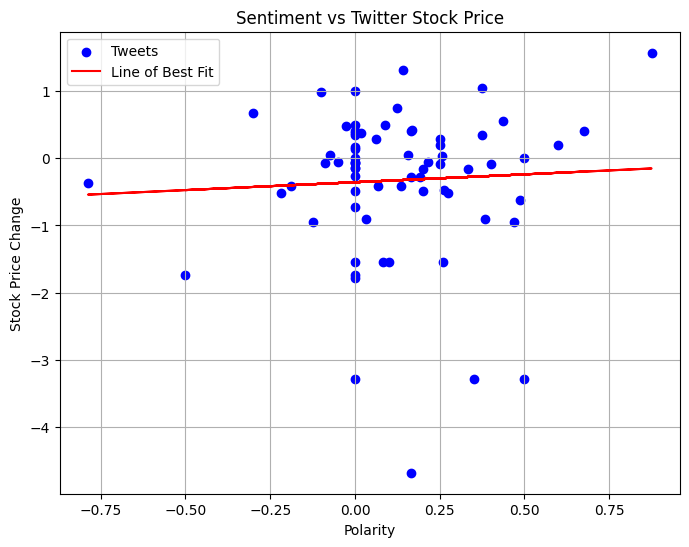

Slope (Coefficient): 0.23415185091586052
Intercept: -0.35722497030244726


In [17]:

X = twitter_result_df_clean_nan[['Polarity']] 
y = twitter_result_df_clean_nan['Stock_Change'] 

# Fit the Linear Regression model
model = LinearRegression()
model.fit(X, y)

# Predict values using the model
y_pred = model.predict(X)

# Plot the data points and the line of best fit
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='blue', label='Tweets')
plt.plot(X, y_pred, color='red', label='Line of Best Fit')

# Customize the plot
plt.title('Sentiment vs Twitter Stock Price')
plt.xlabel('Polarity')
plt.ylabel('Stock Price Change')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()
slope = model.coef_[0]
intercept = model.intercept_
print(f"Slope (Coefficient): {slope}")
print(f"Intercept: {intercept}")

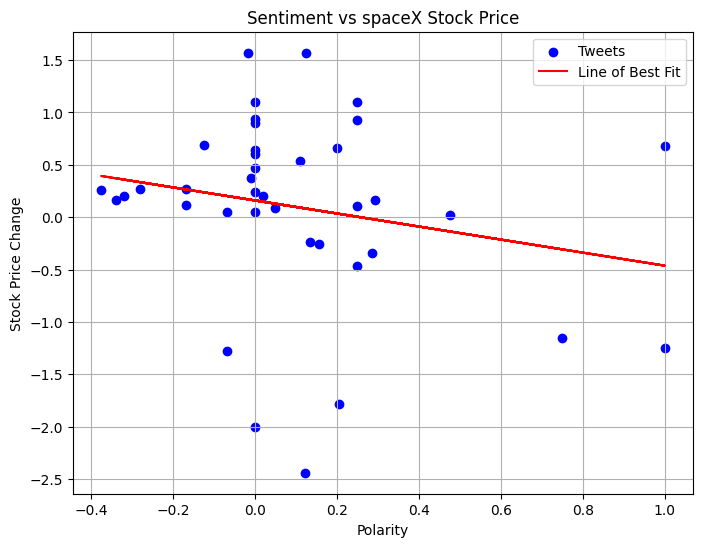

Slope (Coefficient): -0.6229537316421005
Intercept: 0.15985924126665318


In [18]:
X = spaceX_result_df_clean_nan[['Polarity']]  
y = spaceX_result_df_clean_nan['Stock_Change']  

# Fit a Linear Regression model
model = LinearRegression()
model.fit(X, y)

# Predict values using the model
y_pred = model.predict(X)

# Plot the data points and the line of best fit
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='blue', label='Tweets')
plt.plot(X, y_pred, color='red', label='Line of Best Fit')

# Customize the plot
plt.title('Sentiment vs spaceX Stock Price')
plt.xlabel('Polarity')
plt.ylabel('Stock Price Change')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()
slope = model.coef_[0]
intercept = model.intercept_
print(f"Slope (Coefficient): {slope}")
print(f"Intercept: {intercept}")

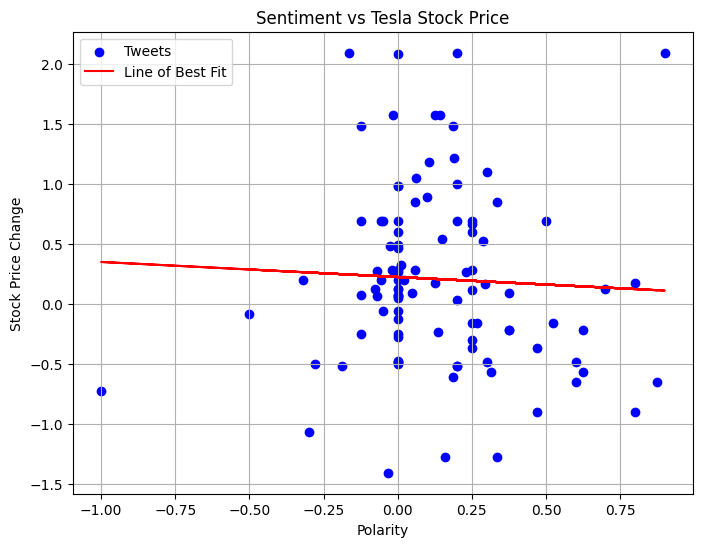

Slope (Coefficient): -0.12552951148926061
Intercept: 0.22087231249076356


In [19]:
X = tesla_result_df_clean_nan[['Polarity']]  
y = tesla_result_df_clean_nan['Stock_Change']  

# Fit a Linear Regression model
model = LinearRegression()
model.fit(X, y)

# Predict values using the model
y_pred = model.predict(X)

# Plot the data points and the line of best fit
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='blue', label='Tweets')
plt.plot(X, y_pred, color='red', label='Line of Best Fit')

# Customize the plot
plt.title('Sentiment vs Tesla Stock Price')
plt.xlabel('Polarity')
plt.ylabel('Stock Price Change')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

slope = model.coef_[0]
intercept = model.intercept_
print(f"Slope (Coefficient): {slope}")
print(f"Intercept: {intercept}")